In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

## Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


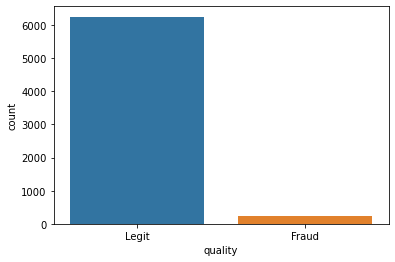

In [8]:
sns.countplot(x='quality',data=df);

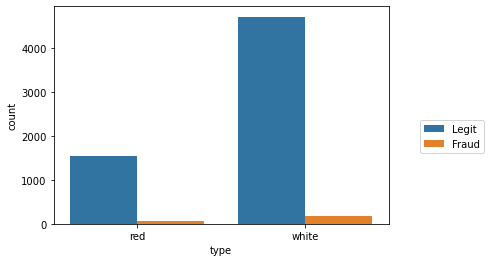

In [9]:
sns.countplot(x='type',data=df,hue='quality')
plt.legend(bbox_to_anchor=(1.3,0.5));

In [10]:
df.groupby('type').count().iloc[:,1]

type
red      1599
white    4898
Name: volatile acidity, dtype: int64

In [11]:
df.groupby(['type','quality']).count().iloc[:,1]

type   quality
red    Fraud        63
       Legit      1536
white  Fraud       183
       Legit      4715
Name: volatile acidity, dtype: int64

In [12]:
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0


In [14]:
df.corr()['Fraud'].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Fraud                   1.000000
Name: Fraud, dtype: float64

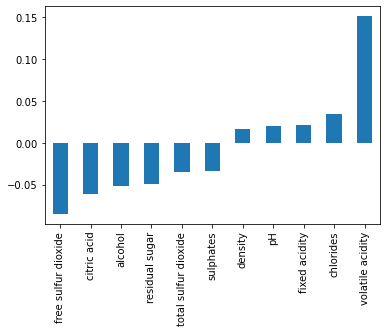

In [15]:
df.corr()['Fraud'].sort_values()[:-1].plot(kind='bar');

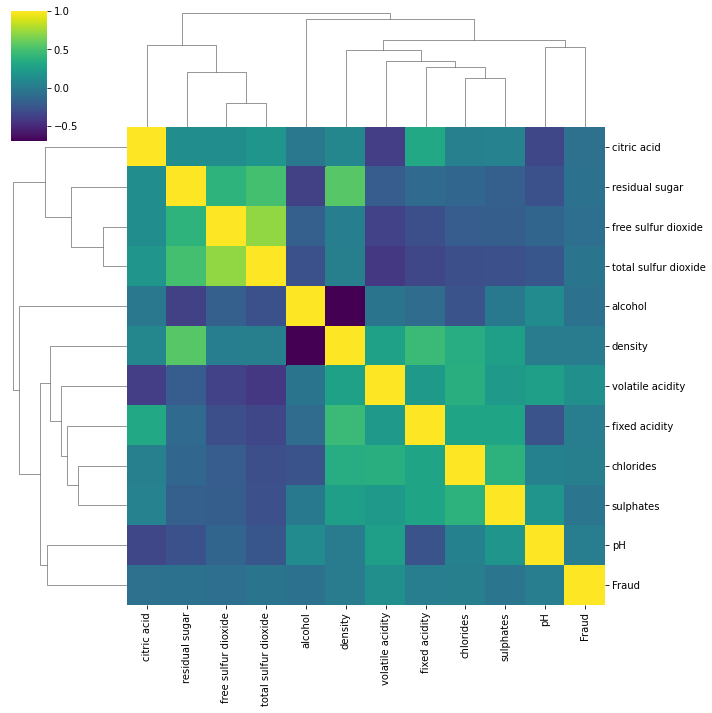

In [16]:
sns.clustermap(df.corr(),cmap='viridis');

## Machine Learning model. 

In [17]:
df1 = pd.get_dummies(data=df,columns = ['type'])

In [18]:
df1.shape

(6497, 15)

In [19]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Fraud,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,1,0


In [20]:
X = df1.drop(['quality','Fraud'],axis=1)

In [21]:
y = df1['quality']

In [22]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaled_X_train = scaler.fit_transform(X_train)

In [28]:
scaled_X_test = scaler.transform(X_test)

In [29]:
from sklearn.svm import SVC

In [43]:
svm_model = SVC(class_weight='balanced')

In [44]:
svm_model.fit(scaled_X_train,y_train)

SVC(class_weight='balanced')

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
y_pred = svm_model.predict(scaled_X_test)

In [47]:
confusion_matrix(y_test,y_pred)

array([[ 17,  10],
       [ 95, 528]], dtype=int64)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.15      0.63      0.24        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



## Grid Search for better results. 

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
params_grid = {'C':[1,2,5,10],'kernel':['linear','rbf','poly'],'gamma':['scale', 'auto'],'degree':[4]}

In [53]:
Grid_model = GridSearchCV(svm_model,params_grid,cv=5,scoring='accuracy')

In [54]:
Grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 2, 5, 10], 'degree': [4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [55]:
Grid_model.best_params_

{'C': 10, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

In [56]:
grid_pred = Grid_model.predict(scaled_X_test)

In [57]:
confusion_matrix(y_test,grid_pred)

array([[ 11,  16],
       [ 47, 576]], dtype=int64)

In [58]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.19      0.41      0.26        27
       Legit       0.97      0.92      0.95       623

    accuracy                           0.90       650
   macro avg       0.58      0.67      0.60       650
weighted avg       0.94      0.90      0.92       650



### Conclusion : The SVM model is not performing up to the mark in detecting fraud wine. The reason behind this is the fact that we have an imbalanced dataset. The machine learning model was trained on a dataset that had way more instances of legit wines than fraud wines.